In [ ]:
##importing relevant libraries
!pip install --quiet astrodash
import numpy as np
import matplotlib.pyplot as plt
import astrodash
import random
import math
import os
import os.path

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
##mounting the drive so astrodash templates can be accessed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def find_all_files_in_directory(path):
  filenames=[]
  for filename in os.listdir(path): 
    filenames.append(filename)
  return filenames

In [ ]:
###Getting ages
def getting_age(filename):
  age=filename.split('_')[0]
  return float(age)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##Clearing the folder
def clearing_folder(path):
  filesToRemove = [os.path.join(path,f) for f in os.listdir(path)]
  for f in filesToRemove:
      os.remove(f) 

In [ ]:
##redshifting spectra using astrodash
def redshifting(fluxes, redshift, nIndexes, dwlog, w0, w1, nw):
    rbs_fluxes=astrodash.helpers.redshift_binned_spectrum(fluxes, redshift, nIndexes, dwlog, w0, w1, nw, outerVal=0.0)
    return rbs_fluxes

In [ ]:
##extracting the data from the datafile
def extracting_data_from_file(path,filename):
    data=np.loadtxt(path+filename)
    wavelengths=data[:,0]
    fluxes=data[:,1]
    return wavelengths, fluxes

In [ ]:
def redshift_value():
  redshift=random.uniform(0,8)/10
  return redshift

In [ ]:
def force_float(string_array):
  for i in range(len(string_array)):
    string_array[i]=float(string_array[i])
  return string_array

In [ ]:
##ordering the Files by age so that we can limit it to -2 and 2 days
#print(filenames_1a)
#print(sorted(filenames_1a))

def constraining_ages(lower_bound,upper_bound,filenames_1a):
  subset_filenames_1a=[]
  
  for file in filenames_1a:
    age=getting_age(file)
    if age>=lower_bound and age<=upper_bound:
      subset_filenames_1a.append(file)
  
  #subset_filenames_1a=sorted(subset_filenames_1a)
  
  return subset_filenames_1a

In [ ]:
##Reading Supernova 1a z=0 data from the drive
lnw_path="/content/drive/MyDrive/SupernovaDM_binned_age_spectra/Type1a_2column/"
filenames_1a=find_all_files_in_directory(lnw_path)

In [ ]:
##picking a random spectra 

filenames_constrained=constraining_ages(-15,40,filenames_1a)
print(f"There are {len(filenames_constrained)} total files in the list")
random.shuffle(filenames_constrained)
total=len(filenames_constrained)


There are 2684 total files in the list


In [ ]:
selected_spectra="//content/drive/MyDrive/SupernovaDM_binned_age_spectra/selected"

total=len(filenames_constrained)

files=filenames_constrained

##Randomly choosing the validation, training and testing set
##10:20:70
validation_amount=int((total*10)/100)
testing_amount=int((total*30)/100)

validation_data=files[:validation_amount]
print(f"There are {len(validation_data)} files in the validation set")
print(validation_data)

testing_data = files[validation_amount:testing_amount]
print(f"There are {len(testing_data)} files in the testing set")
print(testing_data)

training_data = files[testing_amount:]
print(f"There are {len(training_data)} files in the training set")
print(training_data)

print(len(validation_data)+len(testing_data)+len(training_data))

There are 268 files in the validation set
['5.20_sn2006X.lnw', '-2.98_sn05eq_bsnip.lnw', '-4.80_sn1999gp.lnw', '7.80_sn1999ac.lnw', '-10.70_sn1991T.lnw', '-9.70_sn2001ah.lnw', '8.90_sn2006le.lnw', '4.99_sn01ep_bsnip.lnw', '20.40_sn1998ab.lnw', '16.00_sn07qe_bsnip.lnw', '18.30_sn1991bg.lnw', '2.90_sn2000cf.lnw', '33.30_sn2007if.lnw', '9.60_sn1999ef.lnw', '7.14_sn02kf_bsnip.lnw', '-2.70_sn2008ar.lnw', '10.34_sn04bg_bsnip.lnw', '27.40_sn1998bu.lnw', '-7.50_sn2005mz.lnw', '5.04_sn07al_bsnip.lnw', '4.00_sn2003du.lnw', '-3.60_sn2007af.lnw', '18.30_sn2007le.lnw', '-1.90_sn2002aw.lnw', '-6.78_sn02cr_bsnip.lnw', '7.60_sn1999cl.lnw', '18.60_sn02fb_bsnip.lnw', '-12.30_sn2001V.lnw', '16.40_sn2004dt.lnw', '12.70_sn2003du.lnw', '21.30_sn2007le.lnw', '15.00_sn2006ac.lnw', '-9.30_sn2006ax.lnw', '14.90_sn2005hf.lnw', '-4.20_sn2007bd.lnw', '2.30_sn94ae.lnw', '16.20_sn2002dj.lnw', '-0.90_sn1999ac.lnw', '7.50_sn2006N.lnw', '28.76_sn00dk_bsnip.lnw', '36.30_sn1998bu.lnw', '10.40_sn2005gj.lnw', '9.40_sn2007c

In [ ]:
##########
w0=3000
w1=10000
nw=1024
dwlog = np.log(w1/w0)/nw
nIndexes= np.arange(0,nw)
###########

x_train=[]
y_train=[]

x_test=[]
y_test=[]

###############

redshifted_training_path="//content/drive/MyDrive/SupernovaDM_binned_age_spectra/training_set/"
redshifted_testing_path="//content/drive/MyDrive/SupernovaDM_binned_age_spectra/testing_set/"
redshifted_validation_path="//content/drive/MyDrive/SupernovaDM_binned_age_spectra/validation_set/"

clearing_folder(redshifted_training_path)
clearing_folder(redshifted_testing_path)
clearing_folder(redshifted_validation_path)

num_shifts=50

raw_data_path="/content/drive/MyDrive/SupernovaDM_binned_age_spectra/Type1a_2column/"

for validation_filename in validation_data:

  for shift in range(num_shifts):   

    wavelengths, fluxes=extracting_data_from_file(raw_data_path,validation_filename)
                                                  
    redshift=redshift_value()

    ##redshifting the training set
    redshifted_fluxes=redshifting(fluxes, redshift, nIndexes, dwlog, w0, w1, nw)


for training_filename in training_data:

  for shift in range(num_shifts): 

    wavelengths, fluxes=extracting_data_from_file(raw_data_path,training_filename)
  
    redshift=redshift_value()

    ##redshifting the training set
    redshifted_fluxes=redshifting(fluxes, redshift, nIndexes, dwlog, w0, w1, nw)

    ##training x will be the supernova flux
    x_train.append(force_float(redshifted_fluxes))

    ##training y will be the associated redshift
    y_train.append(redshift)
 
x_train=np.array(x_train)
y_train=force_float(y_train)

for testing_filename in testing_data:
  
  for shift in range(num_shifts): 

    wavelengths, fluxes=extracting_data_from_file(raw_data_path,testing_filename)

    redshift=redshift_value()

    ##redshifting the training set
    redshifted_fluxes=redshifting(fluxes, redshift, nIndexes, dwlog, w0, w1, nw)

    ##training x will be the supernova flux
    x_test.append(force_float(redshifted_fluxes))

    ##training y will be the associated redshift
    y_test.append(redshift)

x_test=np.array(x_test)
y_test=force_float(y_test)


In [ ]:
##PREPARING DATA

# Model / data parameters

input_shape = (1024)

# Scaling the spectra to the [0, 1] range
x_train = x_train.astype("float32") / 15
x_test = x_test.astype("float32") / 15

#plt.plot(x_train)

##maintaining relative numbers if dividing by all at end
##could normalise EACH individual spectra
##TO DO: make it so from 0-1, add minimum to all values 

# Make sure images have shape (28, 28, 1)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (93950, 1024)
x_test shape: (26850, 1024)
93950 train samples
26850 test samples


In [ ]:
##reshaping the x_training and x_testing
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],-1))
print(x_train.shape)

x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],-1))
print(x_test.shape)

##number of examples, timesteps, features

(93950, 1024, 1)
(26850, 1024, 1)


In [ ]:
n_timesteps=1
n_features=1024
n_outputs=1

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',))
model.add(Dropout(0.0))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(n_outputs))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [ ]:
##TRAINING THE MODEL
##batch sizes, uses 64
##epochs is how many times its repeating choosing batch_size number from spectra

batch_size = 200
epochs = 20

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

x_train=np.array(x_train)
y_train=np.array(y_train)

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,validation_data=(x_test,y_test))

print(history)
##history should be dictionary
##get loss from it


Train on 93950 samples, validate on 26850 samples
Epoch 1/20
93950/93950 [==============================] - ETA: 0s - loss: 0.0075 - acc: 0.0000e+00

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


93950/93950 [==============================] - 48s 516us/sample - loss: 0.0075 - acc: 0.0000e+00 - val_loss: 0.0035 - val_acc: 0.0000e+00
Epoch 2/20
93950/93950 [==============================] - 20s 215us/sample - loss: 0.0036 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 3/20
93950/93950 [==============================] - 20s 216us/sample - loss: 0.0034 - acc: 0.0000e+00 - val_loss: 0.0031 - val_acc: 0.0000e+00
Epoch 4/20
93950/93950 [==============================] - 20s 216us/sample - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0034 - val_acc: 0.0000e+00
Epoch 5/20
93950/93950 [==============================] - 20s 216us/sample - loss: 0.0032 - acc: 0.0000e+00 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 6/20
93950/93950 [==============================] - 20s 216us/sample - loss: 0.0031 - acc: 0.0000e+00 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 7/20
93950/93950 [==============================] - 20s 215us/sample - loss: 0.0030 - acc: 0.0000e+00 - val_los

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


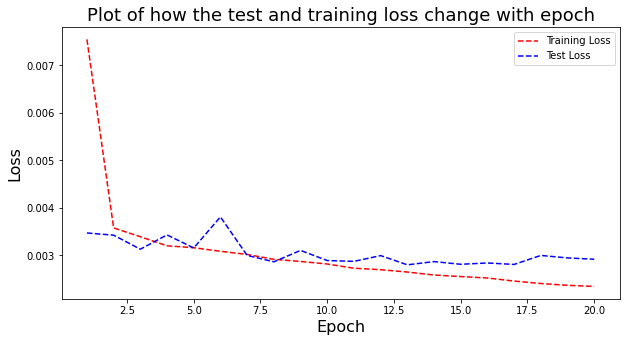

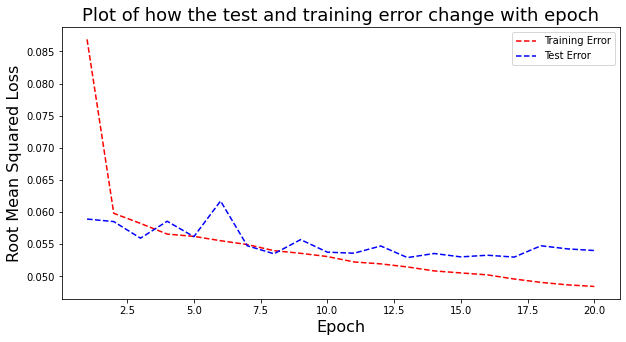

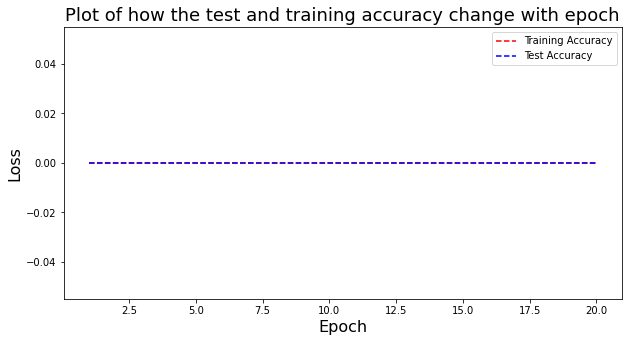

In [ ]:
# Get training and test loss histories
print(history.history.keys())
training_loss = history.history['loss']
test_loss = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize=(10,5))
plt.title("Plot of how the test and training loss change with epoch",size=18)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b--')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch',size=16)
plt.ylabel('Loss',size=16)
plt.show();

# Visualize loss history
plt.figure(figsize=(10,5))
plt.title("Plot of how the test and training error change with epoch",size=18)

training_error=np.ones(len(training_loss))
testing_error=np.ones(len(test_loss))

for i in range(len(training_loss)):
  training_error[i]=(training_loss[i])**0.5

for i in range (len(test_loss)):
  testing_error[i]=(test_loss[i])**0.5

plt.plot(epoch_count,training_error , 'r--')
plt.plot(epoch_count,testing_error , 'b--')
plt.legend(['Training Error', 'Test Error'])
plt.xlabel('Epoch',size=16)
plt.ylabel('Root Mean Squared Loss',size=16)
plt.show();

##Visualising accuracy history
plt.figure(figsize=(10,5))
plt.title("Plot of how the test and training accuracy change with epoch",size=18)
plt.plot(epoch_count, train_acc, 'r--')
plt.plot(epoch_count, val_acc , 'b--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch',size=16)
plt.ylabel('Loss',size=16)
plt.show();

In [ ]:
##EVALUATING THE MODEL

print(type(x_test[0]))
print(type(y_test[0]))

y_test=np.array(y_test)

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

<class 'numpy.ndarray'>
<class 'float'>
Test loss: 0.0029191968984402425
Test accuracy: 0.0


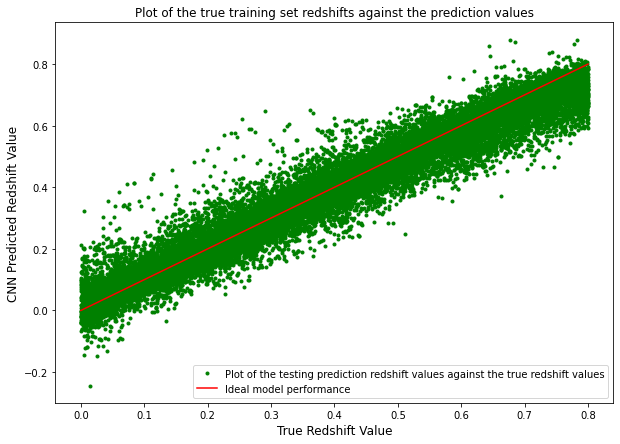

In [ ]:
y_pred_testing=model.predict(x_test)
y_pred_training=model.predict(x_train)


title="Plot of the true training set redshifts against the prediction values"
plt.figure(figsize=(10,7))
plt.plot(y_test,y_pred_testing,'g.',label="Plot of the testing prediction redshift values against the true redshift values")
#plt.plot(y_train,y_pred_training,'b.')
plt.plot(np.linspace(0,0.8),np.linspace(0,0.8),'r',label="Ideal model performance")
plt.title(title, fontsize=12)
plt.xlabel('True Redshift Value', fontsize=12)
plt.ylabel("CNN Predicted Redshift Value", fontsize=12)  
plt.legend(loc="best") 
plt.show()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


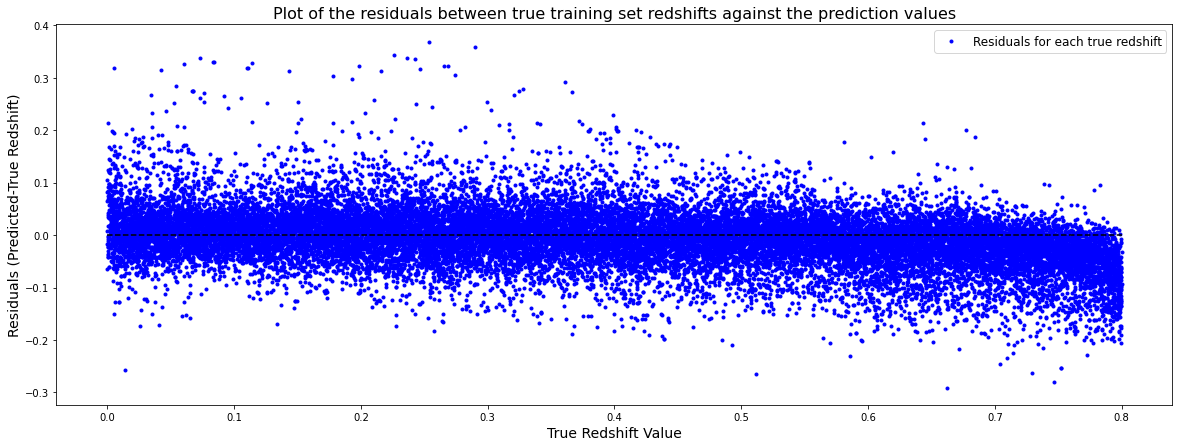

In [ ]:
y_pred_testing=model.predict(x_test)
y_pred_training=model.predict(x_train)

y_test=force_float(list(y_test))
y_pred_testing=force_float(list(y_pred_testing))
residuals=np.zeros(len(y_test))

for i in range(len(y_test)-1):
  residuals[i]=y_pred_testing[i]-y_test[i]

  
title="Plot of the residuals between true training set redshifts against the prediction values"
plt.figure(figsize=(20,7))

plt.plot(y_test,residuals,'b.',label="Residuals for each true redshift")
plt.plot(np.linspace(0,0.8,20),np.zeros(20),"k--")

coeffs=np.polyfit(y_test,residuals,17)
poly=np.poly1d(coeffs)
new_x=np.linspace(0,0.5,1000,6)
new_y= poly(new_x)
#plt.plot(new_x,new_y,'r',label="Fitted polynomial")

plt.title(title, fontsize=16)
plt.xlabel('True Redshift Value', fontsize=14)
plt.ylabel("Residuals (Predicted-True Redshift)", fontsize=14)  
plt.legend(loc="best", fontsize=12) 
plt.show()


No handles with labels found to put in legend.


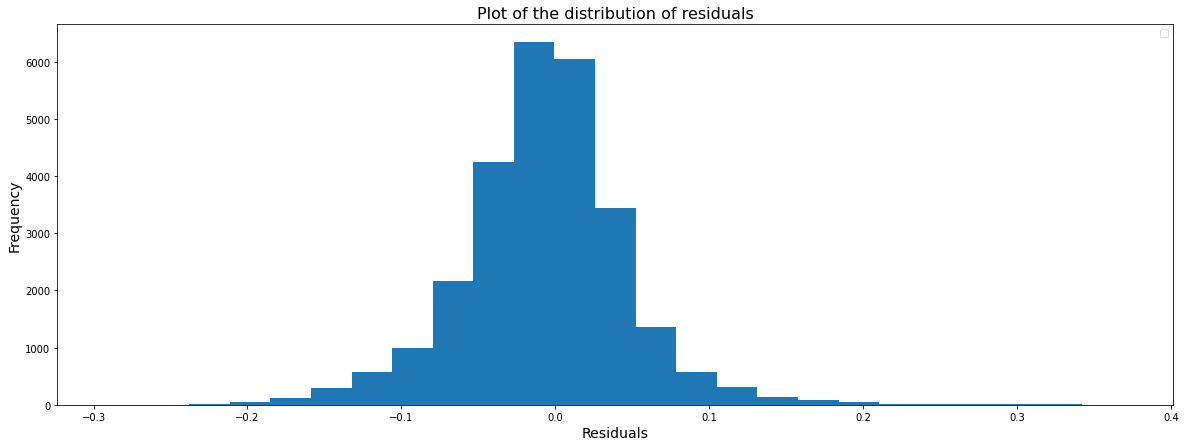

The mean is -0.007087105801790781
The standard deviation is 0.05356264661824965


In [ ]:
title="Plot of the distribution of residuals"
plt.figure(figsize=(20,7))
plt.hist(residuals,bins=25)
plt.title(title, fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel("Frequency", fontsize=14)  
plt.legend(loc="best") 
plt.show()

print(f"The mean is {np.mean(residuals)}")
print(f"The standard deviation is {np.std(residuals)}")

In [ ]:
##saving to files

np.savetxt('epoch_count_1DCNN.txt', epoch_count, fmt='%d')

np.savetxt('train_acc_1DCNN.txt',train_acc, fmt='%d')

np.savetxt('val_acc_1DCNN.txt',val_acc, fmt='%d')

np.savetxt('training_error_1DCNN.txt',training_error, fmt='%d')

np.savetxt('testing_error_1DCNN.txt',testing_error, fmt='%d')

np.savetxt('y_test_1DCNN.txt',y_test, fmt='%d')

np.savetxt('y_test_1DCNN.txt',y_test, fmt='%d')

np.savetxt('y_pred_testing_1DCNN.txt',y_pred_testing, fmt='%d')

np.savetxt('residuals_1DCNN.txt',residuals, fmt='%d')
